In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy. stats import bernoulli, binom, poisson, norm

### Distributions

Statistical distributions describe the probability of different values occurring within a dataset and how frequently these values appear.

#### Bernoulli distributions

A random experiment or observation repeated under the same conditions, where the outcomes are considered in only two ways such as positive-negative, success-failure, valid-invalid, is called a Bernoulli trial.

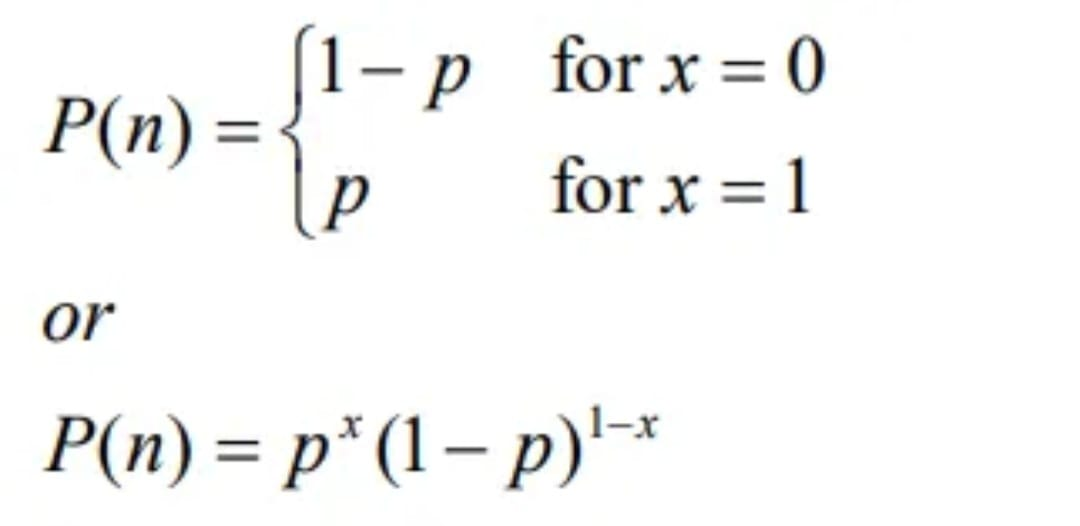

In [2]:
p=0.4

rv=bernoulli(p)

print(rv.pmf(1))

0.4


In [3]:
p = 0.3
n_samples = 1000
data = bernoulli.rvs(p, size=n_samples)

print(data[:10])

[1 0 1 0 1 0 0 0 0 0]


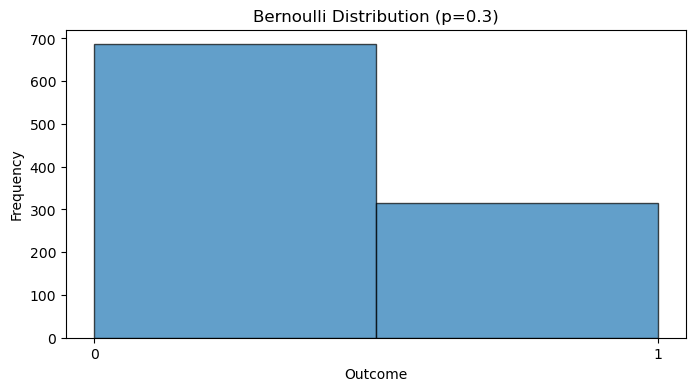

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(data, bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0, 1])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Bernoulli Distribution (p=0.3)')
plt.show()

#### Law of Large Numbers

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists for number of experiments and probabilities
experiments, probabilities = [], []

# Random number generator
rng = np.random.RandomState(123)

# Perform experiments for different numbers of coin tosses
for i in range(1, 20):
    
    number_of_experiments = 2 ** i  # This line is commented out and not used
    
    # Simulate coin tosses (0 for tails, 1 for heads)
    coin_tosses = rng.randint(0, 2, size=number_of_experiments)
    
    # Append the current number of experiments to the list
    experiments.append(i)
    
    # Calculate the probability of heads
    heads_probability = np.mean(coin_tosses)
    
    # Append the calculated probability to the list
    probabilities.append(heads_probability)
    
    # Print the results
    print(f"Number of experiments: {number_of_experiments} -> Probability of heads: {heads_probability}")

Number of experiments: 2 -> Probability of heads: 0.5
Number of experiments: 4 -> Probability of heads: 0.0
Number of experiments: 8 -> Probability of heads: 0.625
Number of experiments: 16 -> Probability of heads: 0.4375
Number of experiments: 32 -> Probability of heads: 0.46875
Number of experiments: 64 -> Probability of heads: 0.5625
Number of experiments: 128 -> Probability of heads: 0.5078125
Number of experiments: 256 -> Probability of heads: 0.52734375
Number of experiments: 512 -> Probability of heads: 0.529296875
Number of experiments: 1024 -> Probability of heads: 0.501953125
Number of experiments: 2048 -> Probability of heads: 0.48583984375
Number of experiments: 4096 -> Probability of heads: 0.494873046875
Number of experiments: 8192 -> Probability of heads: 0.495849609375
Number of experiments: 16384 -> Probability of heads: 0.49957275390625
Number of experiments: 32768 -> Probability of heads: 0.5
Number of experiments: 65536 -> Probability of heads: 0.4967803955078125
Nu

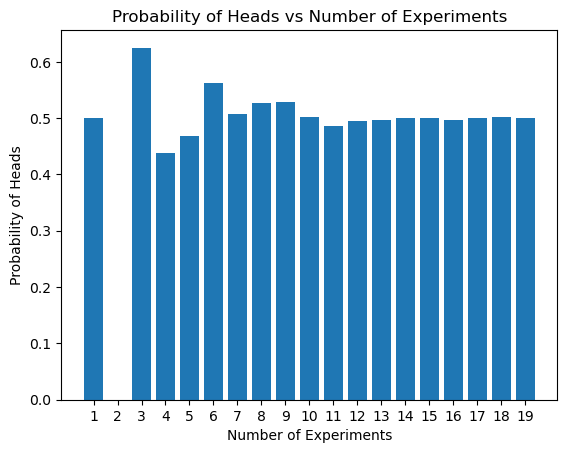

In [6]:
# Plot the results
plt.bar(experiments, probabilities)
plt.xticks(experiments)
plt.xlabel('Number of Experiments')
plt.ylabel('Probability of Heads')
plt.title('Probability of Heads vs Number of Experiments')
plt.show()

#### Binomial distribution

The binomial distribution models the number of successful outcomes in a given number of trials with a specific probability of success. 

If a Bernoulli experiment is repeated n times, it is called a binomial distribution.

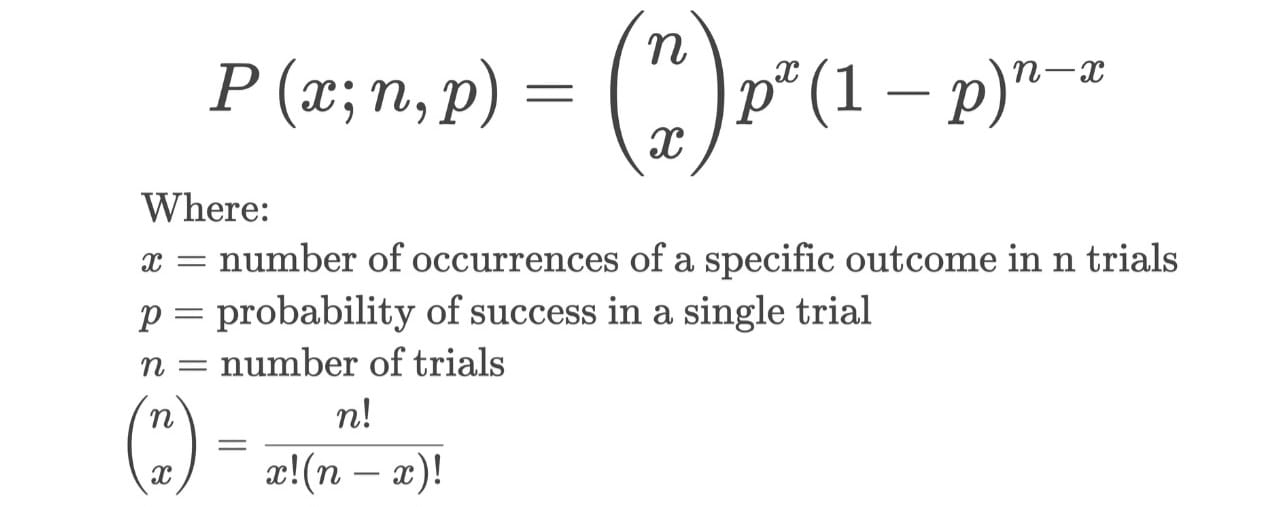

Example: In a hospital, the probability of recovery from a certain disease is 0.3. What are the probabilities that 1, 2, 3, ..., 10 out of every 10 patients will recover?

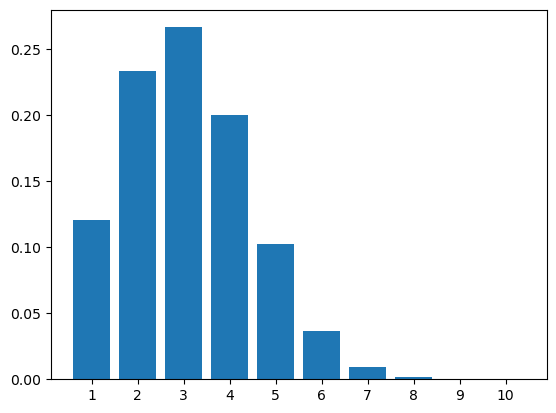

In [7]:
n = 10
p = 0.3

r_values=list(range(1, n+1))

# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 

# plotting the graph  
plt.bar(r_values, dist)
plt.xticks(r_values)
plt.show()

**Question:** In a hospital, the recovery rate for a certain disease is 0.3. What is the probability that at least 2 out of 10 patients will recover?

**Answer:**
We are looking for the probability that at least 2 patients recover, which is P(X≥2). This can be calculated as:
**P(X≥2)=1−P(X<2)**        

This means we need to find the probability that 0 or 1 patient recovers: **P(X<2)=P(X=0)+P(X=1)**

In [8]:
# Parameters
n = 10
p = 0.3

# Probabilities for 0 and 1 patient recovering
p_0 = binom.pmf(0, n, p)
p_1 = binom.pmf(1, n, p)

# Probability of at least 2 patients recovering
p_at_least_2 = 1 - (p_0 + p_1)

print(f"Probability that at least 2 out of 10 patients will recover: {p_at_least_2:.4f}")

Probability that at least 2 out of 10 patients will recover: 0.8507


**Question:** In a lottery draw, the probability of winning a prize with a ticket is 1/10. Calculate the probability of finding 2 winning tickets out of 20 purchased tickets.

In [9]:
# Parameters
n = 20
p = 0.1

print(binom.pmf(2, n, p))

0.28517980706429846


#### Geometric distribution

The geometric distribution is used to find the probability that the first success occurs on the n-th trial in situations with two possible outcomes (success and failure). The primary purpose of the geometric distribution is to model the number of trials until the first success.

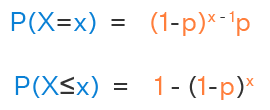

**Example:**"In a hospital, the probability of recovering from a disease is 0.05. What is the probability that the first recovered patient will be the 8th patient?"

In [10]:
# Probability of success (recovery)
p = 0.05

# Probability of the first success (recovery) on the nth trial
n = 8
prob = (1 - p)**(n-1) * p

print(f"The probability that the first recovered patient will be the 8th patient is: {prob}")

The probability that the first recovered patient will be the 8th patient is: 0.03491686480468749


**Example:** A student who wants to become a pilot has a 0.7 probability of passing the written exam for a private pilot's license. Based on this information:      
**a)** What is the probability that a student will pass this exam on the 3rd attempt?         
**b)** What is the probability that a student will pass this exam before the 4th attempt?

In [11]:
# Probability of success (passing the exam)
p = 0.7

# a) Probability of passing on the 3rd attempt
n = 3
prob_3rd_attempt = (1 - p)**(n-1) * p

# b) Probability of passing before the 4th attempt
prob_before_4th_attempt = sum((1 - p)**(i-1) * p for i in range(1, 4))

print(f"The probability of passing the exam on the 3rd attempt is: {prob_3rd_attempt}")
print(f"The probability of passing the exam before the 4th attempt is: {prob_before_4th_attempt}")

The probability of passing the exam on the 3rd attempt is: 0.06300000000000001
The probability of passing the exam before the 4th attempt is: 0.973


#### Poisson distribution

Poisson Distribution is a probability distribution used to model the number of rare events occurring within a fixed interval of time or space. It is widely used to estimate the probability of a certain number of events happening when the events are rare and independent of each other.

Characteristics of Poisson Distribution:

• Independence of Events: The Poisson distribution assumes that events occur independently of each other.

• Fixed Event Rate: The average number of events occurring in a fixed interval or area is constant.

• Rare Events: The probability of events occurring is very small; for example, the probability of a specific event happening in a given hour or area is small.

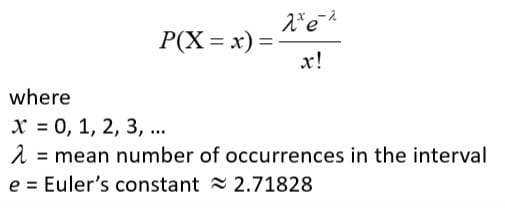

Note: n>50 and n*p<5

In [12]:
lambda_=0.1

rv=poisson(mu=lambda_)

print(rv.pmf(k=0))

0.9048374180359595


**Example:** At a certain intersection, the average number of accidents over a 4-month period is 3.      
**a)** What is the probability of having 7 accidents in 4 months?      
**b)** What is the probability of having 5 accidents in 6 months?        
**c)** What is the probability that at least 2 out of 10 patients will recover? 

In [13]:
# Part a: Probability of 7 accidents in 4 months
lambda_4_months = 3
p_7_accidents_4_months = poisson.pmf(7, lambda_4_months)

# Part b: Probability of 5 accidents in 6 months
lambda_monthly = 3 / 4
lambda_6_months = 6 * lambda_monthly
p_5_accidents_6_months = poisson.pmf(5, lambda_6_months)

# Part c: Probability that at least 2 out of 10 patients will recover
n_patients = 10
p_recovery = 0.3

# Probability of 0 or 1 patient recovering
p_0_recoveries = binom.pmf(0, n_patients, p_recovery)
p_1_recovery = binom.pmf(1, n_patients, p_recovery)

# Probability of at least 2 patients recovering
p_at_least_2_recoveries = 1 - (p_0_recoveries + p_1_recovery)

print(f"Probability of 7 accidents in 4 months: {p_7_accidents_4_months:.4f}")
print(f"Probability of 5 accidents in 6 months: {p_5_accidents_6_months:.4f}")
print(f"Probability that at least 2 out of 10 patients will recover: {p_at_least_2_recoveries:.4f}")

Probability of 7 accidents in 4 months: 0.0216
Probability of 5 accidents in 6 months: 0.1708
Probability that at least 2 out of 10 patients will recover: 0.8507


**Example:** At a certain intersection, the average number of accidents over a 4-month period is 3. What are the probabilities of having 0, 1, ..., 10 accidents at this intersection over a 4-month period?

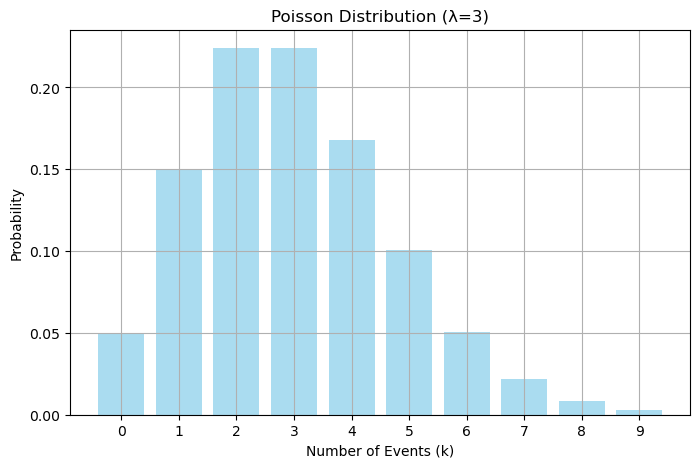

In [14]:
# Mean number of events (lambda)
mu = 3

# Possible number of events
k_values = np.arange(0, 10)

# Calculate Poisson distribution probabilities
poisson_probs = poisson.pmf(k_values, mu)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(k_values, poisson_probs, color='skyblue', alpha=0.7)
plt.title('Poisson Distribution (λ=3)')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Normal distribution**

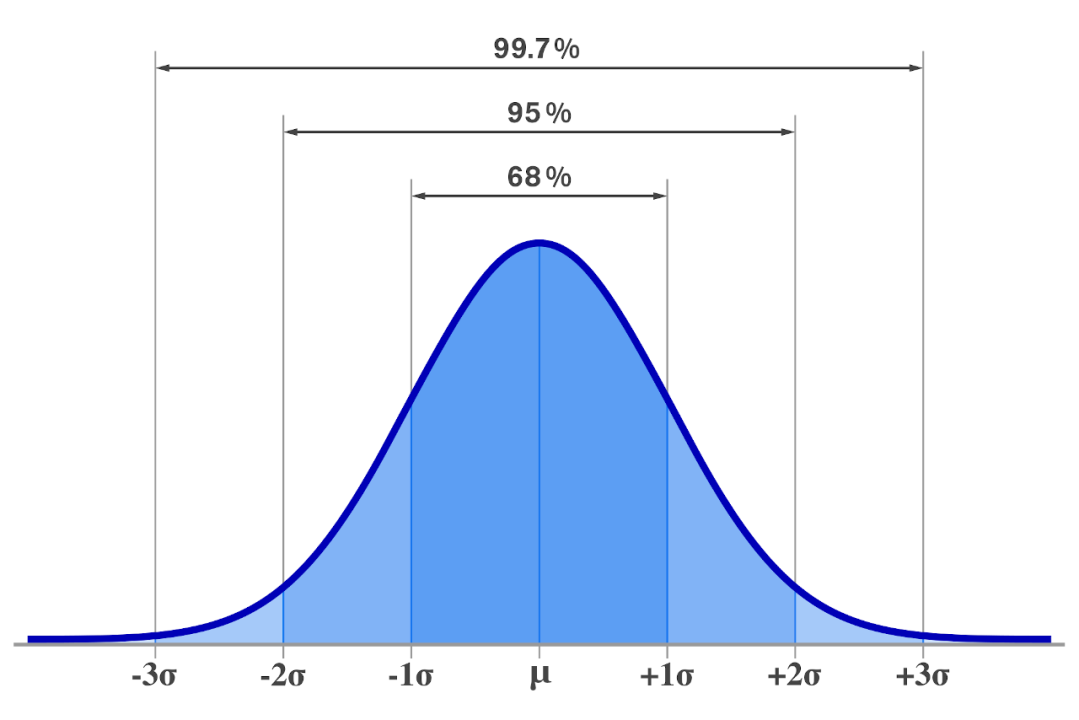

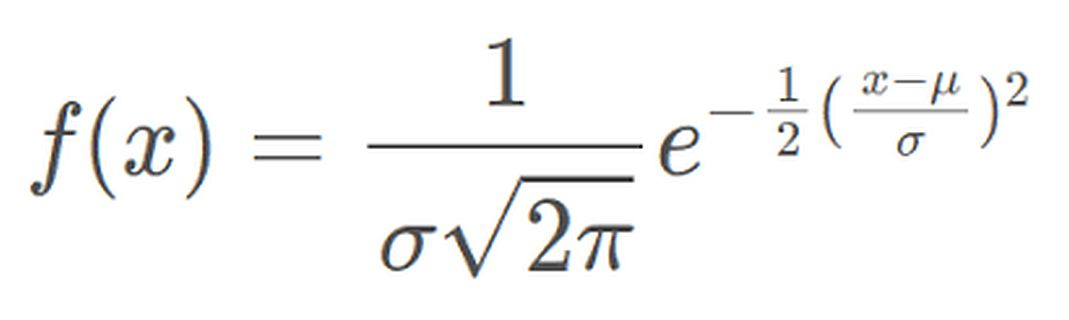

$$ ∫_{-∞}^{+∞} f(x) dx=1 $$

$$ P(x=a)=0 $$

$$ P(a<x<=b)= ∫_{a}^{b} f(x) dx  $$

#### Standard Normal Distribution

It is standardized to have a mean of 0 and a variance of 1

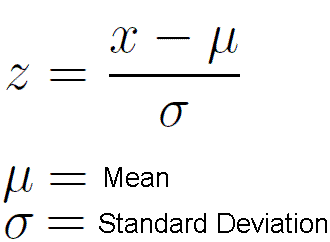

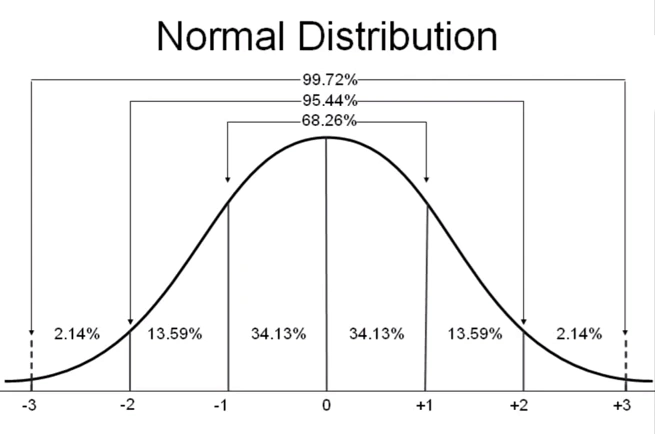

In [15]:
mean = 0
std_dev = 1

n_samples = 1000

data = np.random.normal(mean, std_dev, n_samples)

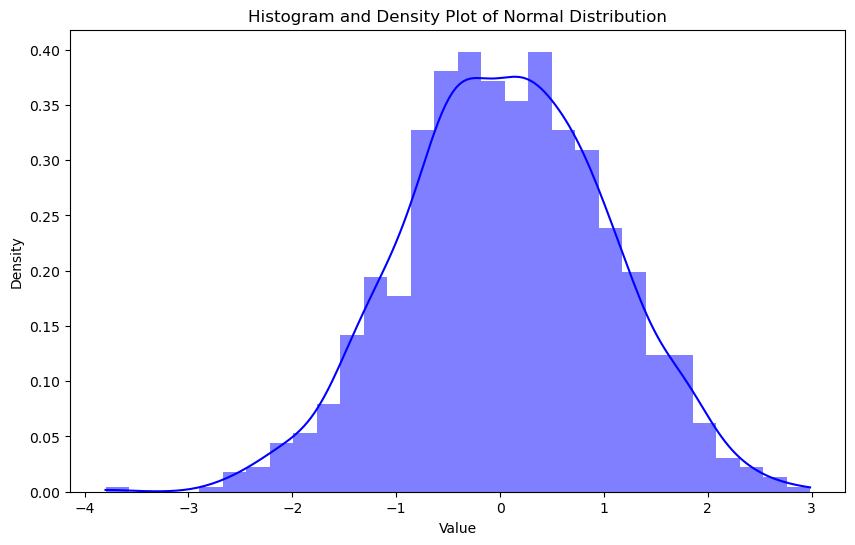

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(data, bins=30, kde=True, color='blue', stat="density", linewidth=0)

plt.title('Histogram and Density Plot of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

**Example:** Calculate P(x < 5) for a normal distribution with a mean of 6 and a standard deviation of 2

$$ P(x<5)=P(z<\frac{5-6}{2})= P(z<-0.5) $$

In [17]:
# Parameters
mean = 6
std_dev = 2

# Calculate P(x < 5)
p_x_less_than_5 = norm.cdf(5, mean, std_dev)

print(f"P(x < 5) for a normal distribution with mean 6 and standard deviation 2: {p_x_less_than_5:.4f}")

P(x < 5) for a normal distribution with mean 6 and standard deviation 2: 0.3085


**Example**:It is known that the probability distribution of the random variable X follows a normal distribution. This probability distribution has a mean of 10 and a standard deviation of 2. Based on this information, answer the following questions:

a) P(x=15)?

b) P(x<15)?

c) P(8<x<11)?

d) P(x<20)?

In [18]:
 # Parameters
mean = 10
std_dev = 2

# a) P(x = 15)
# For a continuous normal distribution, the probability of a single point is 0
p_x_equals_15 = 0

# b) P(x < 15)
p_x_less_than_15 = norm.cdf(15, mean, std_dev)

# c) P(8 < x < 11)
p_8_less_than_x_less_than_11 = norm.cdf(11, mean, std_dev) - norm.cdf(8, mean, std_dev)

# d) P(x < 20)
p_x_less_than_20 = norm.cdf(20, mean, std_dev)

print(f"a) P(x = 15): {p_x_equals_15}")
print(f"b) P(x < 15): {p_x_less_than_15:.4f}")
print(f"c) P(8 < x < 11): {p_8_less_than_x_less_than_11:.4f}")
print(f"d) P(x < 20): {p_x_less_than_20:.4f}")

a) P(x = 15): 0
b) P(x < 15): 0.9938
c) P(8 < x < 11): 0.5328
d) P(x < 20): 1.0000


#### Binomial Distribution Normal Approximation

$$ z=\frac{(x-n*p)} {\sqrt{n*p*q}} $$

**Example:** Suppose a factory produces light bulbs, and the probability that a randomly chosen light bulb is defective is 0.05. If 200 light bulbs are tested, what is the probability that fewer than 8 light bulbs are defective?

$$ P(x<8)=P(x<7.5)=P(z<\frac{(7.5-200*0.05)} {\sqrt{200*0.05*0.95}})= P(z<\frac{7.5}{\sqrt{9.3}})=P(z<-0.82) $$

In [19]:
from scipy.stats import norm

# Parameters
n = 200
p = 0.05

# Mean and standard deviation for the normal approximation
mu = n * p
sigma = (n * p * (1 - p)) ** 0.5

# Continuity correction
upper_bound = 7.5

# Convert to standard normal distribution (Z-scores)
z_upper = (upper_bound - mu) / sigma

# Calculate probability using the standard normal distribution
p_upper = norm.cdf(z_upper)

print(f"Mean (μ): {mu:.4f}")
print(f"Standard Deviation (σ): {sigma:.4f}")
print(f"Z-score for upper bound: {z_upper:.4f}")
print(f"P(X < 8) ≈ P(X ≤ 7.5): {p_upper:.4f}")

Mean (μ): 10.0000
Standard Deviation (σ): 3.0822
Z-score for upper bound: -0.8111
P(X < 8) ≈ P(X ≤ 7.5): 0.2087
